In [1]:
"""
To describe the workflow using some methods

** Intended to be used line by line
"""
import matplotlib.pyplot as plt # to be removed later.
import numpy.ma as ma
import numpy as np

import data_reduction as dr

In [2]:
bc = dr.BinaryConvert()  # Call the object

Welcome!
Start by defining a path to the folder with the MKID readout data using select_files() method


In [3]:
# mkid_files = bc.select_files() # Select the MKID readout files
# bc.save_fsp_pickle(mkid_files, "Mars_0601") # to average and save the fsp files to a single binary file.

In [4]:
data = bc.load_pickle("Mars_0601.pickle")

In [6]:
#### To check which pixels are good #####
# for i in range(len(data)):
#     bc.plot(data, i+1)

In [7]:
exclude = [48, 71, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 89, 90, 91, 92, 93, 94, 95, 98, 99]
bc.pixels_to_exclude(exclude) # to exclude these pixels from further calculations.

In [13]:
freq = bc.identify_frequencies(data, 4000, exclude=True, plot=False, save_file=True)

KeyboardInterrupt: 

In [9]:
clipped = bc.clip(data, 16 * 255, -16 * 160) # clip for decorrelation

In [10]:
jump_removed = bc.changepoint_remove(clipped, 1000, 17173)

In [11]:
mean_sub = bc.mean_center(clipped)

78


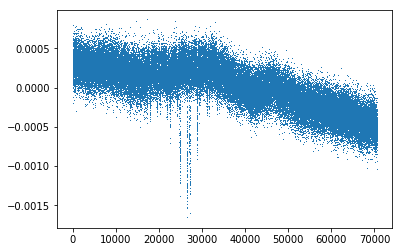

In [14]:
print(len(mean_sub))  # Important, use only the good and mean subtracted data.
plt.plot(mean_sub[2], ',')
plt.show()

In [15]:
# PCA decorrelation
res_pca = bc.pca_decor(mean_sub, n_components=3)

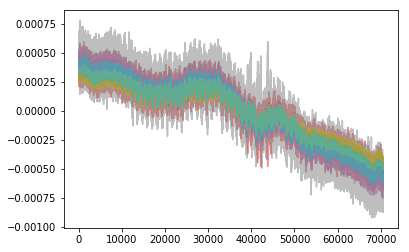

In [16]:
for i in range(10):
    plt.plot(res_pca[i][:, 1], alpha = 0.5)

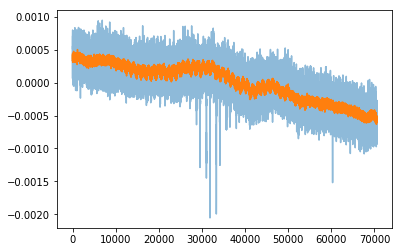

In [22]:
result_pca = res_pca # To create a backup for the first PCA

pix = 1
plt.plot(result_pca[pix][:,2], alpha=0.5)
plt.plot(result_pca[pix][:,1])
plt.show()

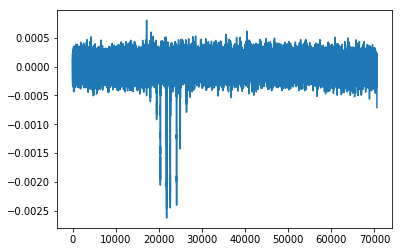

In [24]:
plt.plot(result_pca[0][:,0])
plt.show()

In [25]:
flat = bc.flatten(res_pca, 0)
mask = bc.get_sigmaclipped_mask(flat, avg_points=32, sigma=4, maxiters=4, axis=1)

(78, 70565)


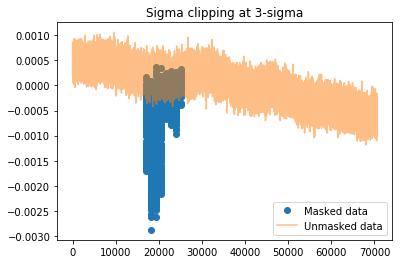

In [26]:
# ----------- TO GET THE SIGMA CLIPPED MASK PLOT --------------------
pix = 4
# plt.plot(running_avged[pix])
plt.plot(ma.masked_array(mean_sub[pix], ~mask[pix]), 'o', label='Masked data')
plt.plot(ma.masked_array(mean_sub[pix], mask[pix]), label='Unmasked data', alpha = 0.5)
plt.legend()
plt.title('Sigma clipping at 3-sigma')
plt.show()

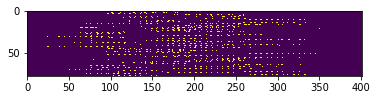

In [29]:
# -------------------------------------------------------------------

chunk_matrix = bc.make_chunk_matrix(mask, num_chunks=400)

plt.imshow(chunk_matrix)
# plt.colorbar()
plt.show()

In [30]:
# ---------  CHUNK PCA METHOD CHECKING ------------------------------

final = bc.chunkpca_decor(mask, chunk_matrix, mean_sub)

chunk 0 pool data length is (78, 176)
chunk 1 pool data length is (78, 176)
chunk 2 pool data length is (78, 176)
chunk 3 pool data length is (78, 176)
chunk 4 pool data length is (78, 176)
chunk 5 pool data length is (78, 176)
chunk 6 pool data length is (78, 176)
chunk 7 pool data length is (78, 176)
chunk 8 pool data length is (78, 176)
chunk 9 pool data length is (78, 176)
chunk 10 pool data length is (78, 176)
chunk 11 pool data length is (78, 176)
chunk 12 pool data length is (77, 176)
chunk 13 pool data length is (78, 176)
chunk 14 pool data length is (78, 176)
chunk 15 pool data length is (78, 176)
chunk 16 pool data length is (78, 176)
chunk 17 pool data length is (77, 176)
chunk 18 pool data length is (77, 176)
chunk 19 pool data length is (78, 176)
chunk 20 pool data length is (78, 176)
chunk 21 pool data length is (78, 176)
chunk 22 pool data length is (78, 176)
chunk 23 pool data length is (78, 176)
chunk 24 pool data length is (76, 176)
chunk 25 pool data length is (76, 1

chunk 209 pool data length is (73, 176)
chunk 210 pool data length is (78, 176)
chunk 211 pool data length is (78, 176)
chunk 212 pool data length is (78, 176)
chunk 213 pool data length is (71, 176)
chunk 214 pool data length is (61, 176)
chunk 215 pool data length is (65, 176)
chunk 216 pool data length is (68, 176)
chunk 217 pool data length is (78, 176)
chunk 218 pool data length is (78, 176)
chunk 219 pool data length is (70, 176)
chunk 220 pool data length is (64, 176)
chunk 221 pool data length is (60, 176)
chunk 222 pool data length is (68, 176)
chunk 223 pool data length is (78, 176)
chunk 224 pool data length is (78, 176)
chunk 225 pool data length is (78, 176)
chunk 226 pool data length is (72, 176)
chunk 227 pool data length is (62, 176)
chunk 228 pool data length is (63, 176)
chunk 229 pool data length is (71, 176)
chunk 230 pool data length is (77, 176)
chunk 231 pool data length is (78, 176)
chunk 232 pool data length is (73, 176)
chunk 233 pool data length is (65, 176)


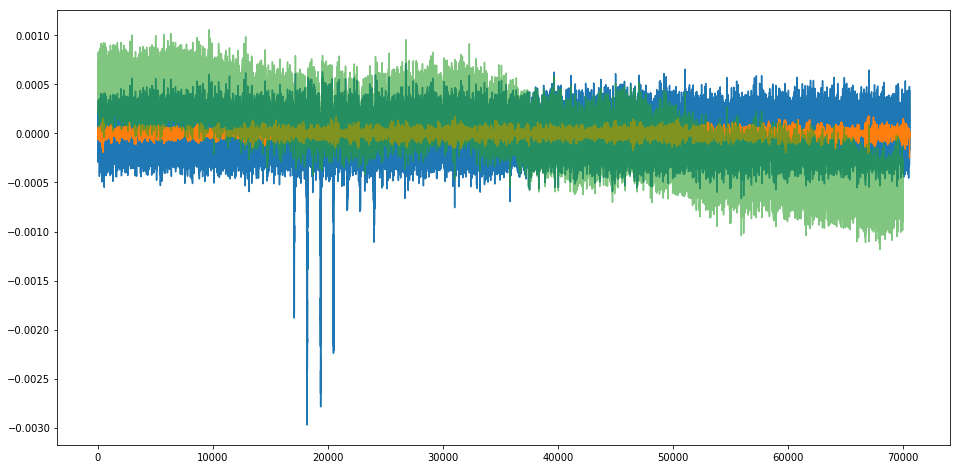

In [31]:
plt.rcParams['figure.figsize'] = [16, 8]
N = 32
pix = 4
plt.plot(final[pix][:,2])# - np.mean(final[pix][:,0]))
plt.plot(final[pix][:,1])
plt.plot(ma.masked_array(mean_sub[pix][(0):(70000)], mask[pix][(0):(70000)]), alpha=0.6)
plt.show()

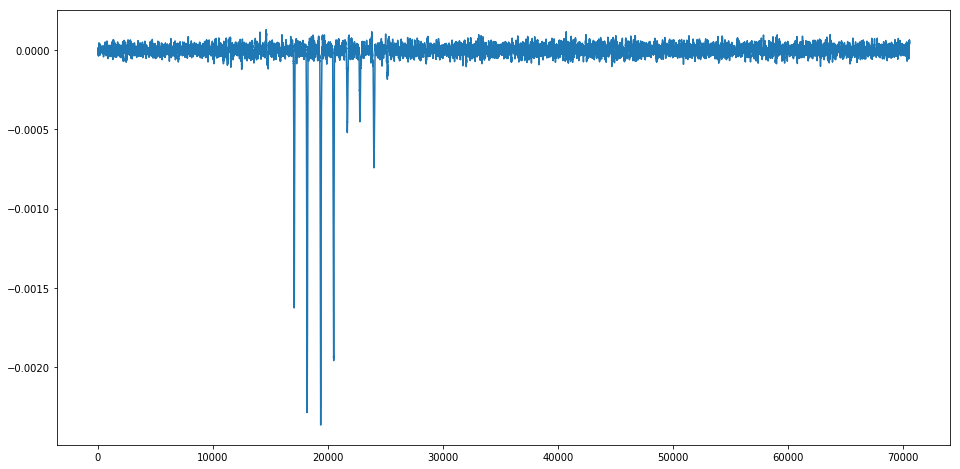

In [32]:
plt.plot(np.convolve(final[pix][:,0], np.ones((N,))/N, mode='same'))
plt.show()

In [33]:
final_flat = bc.flatten(final, 0)
bc.save_as_pickle(final_flat, "final_flat")

File final_flat has been created successfully!


In [34]:
cleaned = bc.load_pickle("final_flat.pickle")

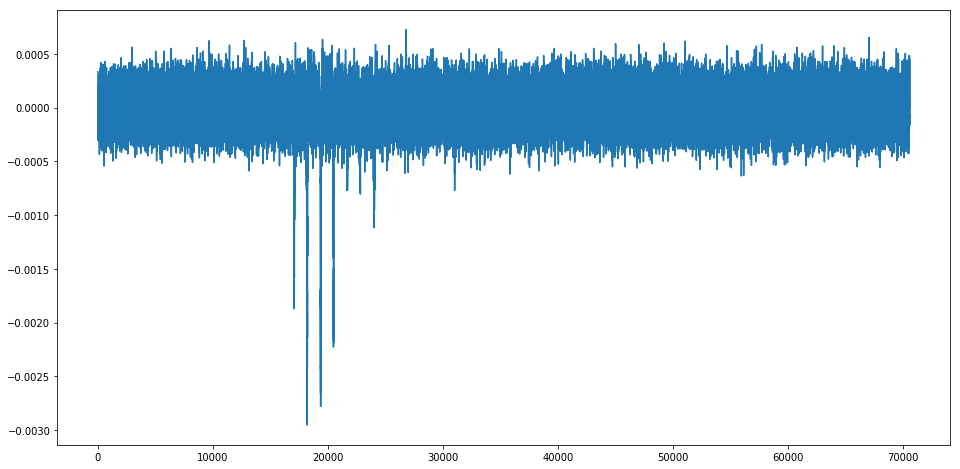

In [36]:
plt.plot(cleaned[pix], )
plt.show()

In [37]:
freq = bc.load_frequency()
pix_bright = bc.find_source_frequency(cleaned, minimaorder=4000)

[[1, -0.0026372234294058396], [2, -0.0021684471621221833], [3, -0.0018616492841185984], [4, -0.0019430007446175753], [5, -0.0029531113676394597], [6, -0.0023373022534928923], [7, -0.0019623629237043513], [8, -0.00268897828886737], [9, -0.0019287803163360426], [10, -0.0018908388929220123], [11, -0.0018523837677272155], [12, -0.0014095282630292932], [13, -0.0027387849259404226], [14, -0.0031775599212520577], [15, -0.0028019773748068737], [16, -0.0022006755100400853], [17, -0.0034828830544996266], [18, -0.001575528942339588], [19, -0.0024102560059822043], [20, -0.0023074544553575473], [21, -0.0026055041065718215], [22, -0.0023319857665975077], [23, -0.0018851034258171122], [24, -0.0023000383229150726], [25, -0.003123519820380317], [26, -0.0030904113706003962], [27, -0.0025105212256075564], [28, -0.0025030921926840486], [29, -0.0016312957745211003], [30, -0.0026714259290539274], [31, -0.0017806425414895156], [32, -0.002148705182486426], [33, -0.0032017379415476286], [34, -0.002585864015407

0 0.023156891073540464
0
1 0.02172301062500992
1
2 0.02161577557626515
2
3 0.01980800650017045
3
4 0.025413385002821087
4
5 0.021982589383014783
5
6 0.021729039287492924
6
7 0.022511691909585352
7
8 0.01916618805307735
8
9 0.019996581567056637
9
10 0.021604515918397738
10
11 0.02040468690029229
11
12 0.02535569267683968
12
13 0.025848268328445556
13
14 0.023191099150153605
14
15 0.023290594059290015
15
16 0.026970427436936006
16
17 0.021078300779436177
17
18 0.023106791887585132
18
19 0.022385572819757726
19
20 0.024509212026259775
20
21 0.020857126639157286
21
22 0.021240503780290965
22
23 0.025139591406514228
23
24 0.02795123317105208
24
25 0.025236306647684614
25
26 0.024739370262523153
26
27 0.026252020052879743
27
28 0.01970456832623313
28
29 0.02327391435323989
29
30 0.021257985734337126
30
31 0.025851145080196147
31
32 0.02474476822703764
32
33 0.023428105228958884
33
34 0.02097773565992611
34
35 0.024636493176785734
35
36 0.025601723118597874
36
37 0.021674336643400238
37
38 0.

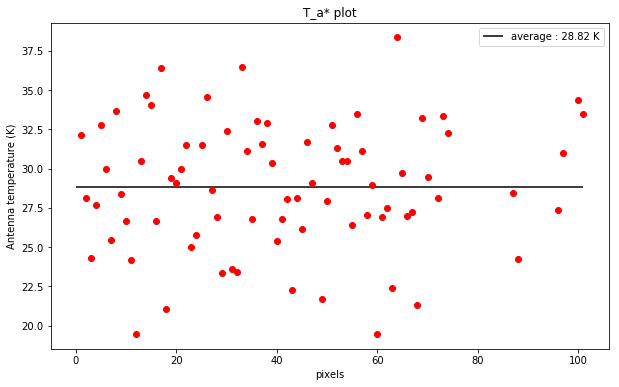

[[  1.          32.11558083]
 [  2.          28.14997011]
 [  3.          24.28712753]
 [  4.          27.66185532]
 [  5.          32.76924367]
 [  6.          29.9836941 ]
 [  7.          25.46759372]
 [  8.          33.68435747]
 [  9.          28.37893731]
 [ 10.          26.66538608]
 [ 11.          24.17884411]
 [ 12.          19.48017983]
 [ 13.          30.46011635]
 [ 14.          34.66661234]
 [ 15.          34.07158991]
 [ 16.          26.64554164]
 [ 17.          36.41666502]
 [ 18.          21.07850943]
 [ 19.          29.41525578]
 [ 20.          29.06792521]
 [ 21.          29.97861201]
 [ 22.          31.52974988]
 [ 23.          25.02761571]
 [ 24.          25.80037187]
 [ 25.          31.51319242]
 [ 26.          34.53342118]
 [ 27.          28.61701725]
 [ 28.          26.88829267]
 [ 29.          23.34612973]
 [ 30.          32.36851784]
 [ 31.          23.6212971 ]
 [ 32.          23.43938188]
 [ 33.          36.48812109]
 [ 34.          31.12559233]
 [ 35.        

In [38]:
antenna_temp = bc.antenna_temperature(freq, pix_bright, 282, plot=True)
print(antenna_temp)

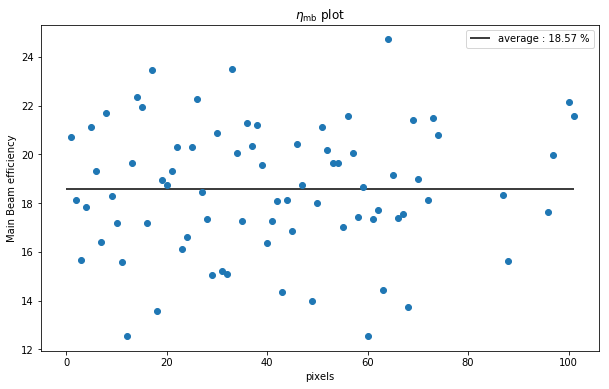

In [39]:
eta_mb = bc.get_main_beam_efficiency(antenna_temp, 1e+11, 195, 15.3, 15.3, 17.7, plot=True)

In [41]:
print(eta_mb)

[[  1.          20.69530688]
 [  2.          18.13986405]
 [  3.          15.65064509]
 [  4.          17.82532247]
 [  5.          21.11652776]
 [  6.          19.3215173 ]
 [  7.          16.41133848]
 [  8.          21.70622784]
 [  9.          18.2874107 ]
 [ 10.          17.18319687]
 [ 11.          15.58086717]
 [ 12.          12.55304401]
 [ 13.          19.6285242 ]
 [ 14.          22.3391937 ]
 [ 15.          21.95576075]
 [ 16.          17.1704091 ]
 [ 17.          23.46692909]
 [ 18.          13.58300893]
 [ 19.          18.95521518]
 [ 20.          18.73139507]
 [ 21.          19.31824241]
 [ 22.          20.31779693]
 [ 23.          16.12781629]
 [ 24.          16.625781  ]
 [ 25.          20.30712729]
 [ 26.          22.25336521]
 [ 27.          18.44082961]
 [ 28.          17.32683806]
 [ 29.          15.04426533]
 [ 30.          20.8582997 ]
 [ 31.          15.22158341]
 [ 32.          15.10435709]
 [ 33.          23.51297545]
 [ 34.          20.05735747]
 [ 35.        